## Load libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# file path
path = r'/Users/elliothaigh/Desktop/Data Analytics Course/Airlines Project'

In [3]:
# Load dataset
df = pd.read_pickle(os.path.join(path, '01 Data', 'flights_merged.pkl'))

In [4]:
# Create subset of variables for exploritory analysis
sub = df[[ 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

### Correlation Heatmap

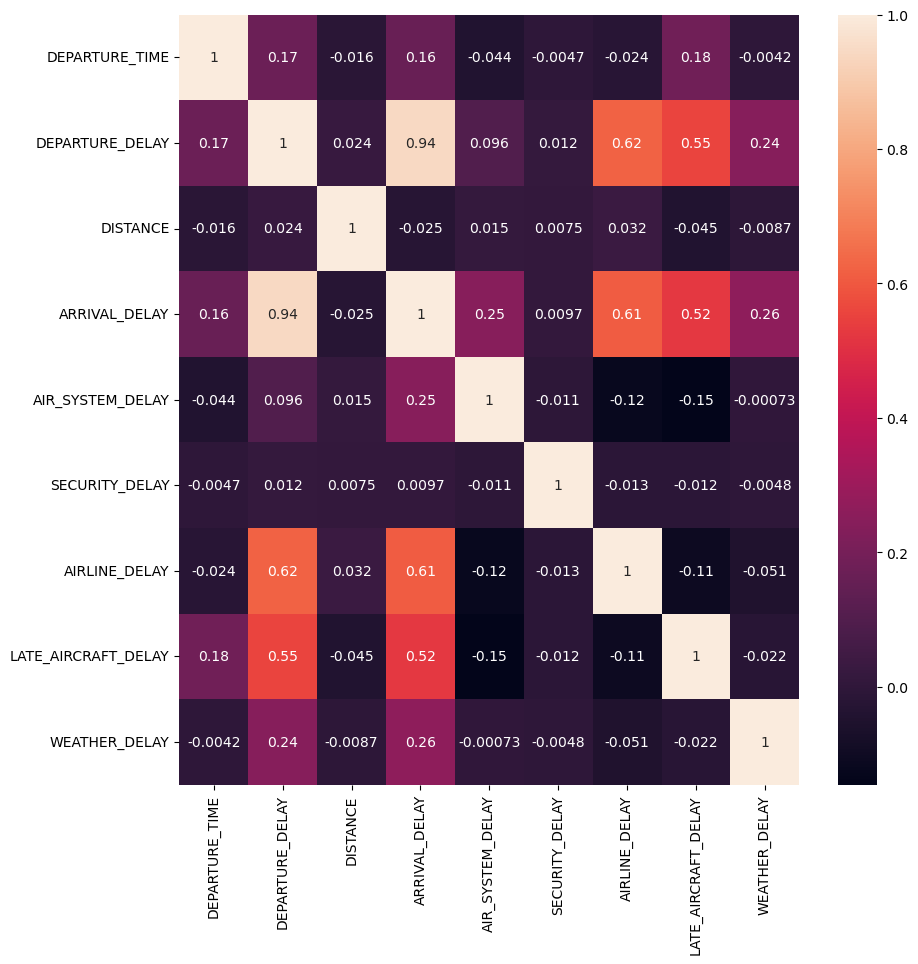

In [5]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In the heatmap above we can the correlations between a number of our numeric variables in our dataset. The legend on the right shows that the boxes with lighter colours represent strong correlations, orange and red boxes represent moderate correlation and the darker purple and black boxes have weak correlations. 

Unsurprisingly many of the boxes in our matrix show weak correlations. This is because many of the variables represent a different type of delay and thus there is little correlation between them.

We can see however that airline delays and late aircraft delays are the leading correlation variables with both arrival and departure delays.

Also unsurprising is that there is a very strong correlation between departure delay and arrival delay meaning that very often airlines fail to make up the time lost.

## Scatterplots

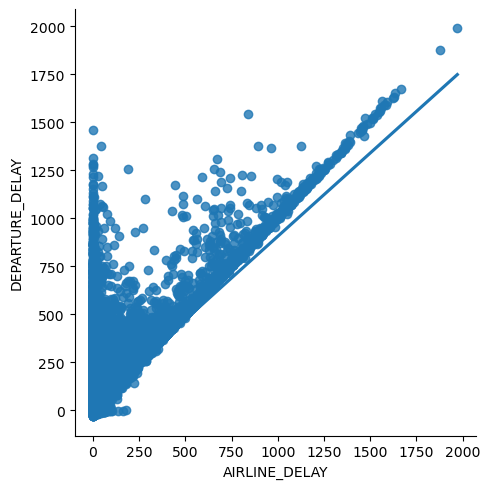

In [6]:
# Create a scatterplot for the "AIRLINE_DELAY" and "DEPARTURE_DELAY" columns in seaborn

airline_delay_scatterplot = sns.lmplot(x = 'AIRLINE_DELAY', y = 'DEPARTURE_DELAY', data = df)

In the scatterplot above we can see a strong positive correlation between departure delay and airline delays, represented by the bottom left to top right pattern. We can also see however that there is a large cluster around 0 on the airline delay that goes verticle on the y axis. This is because there are other causes of delay other than airline delays and thus some flights may have significant departure delays for reasons than have nothing to do with airline issues. 

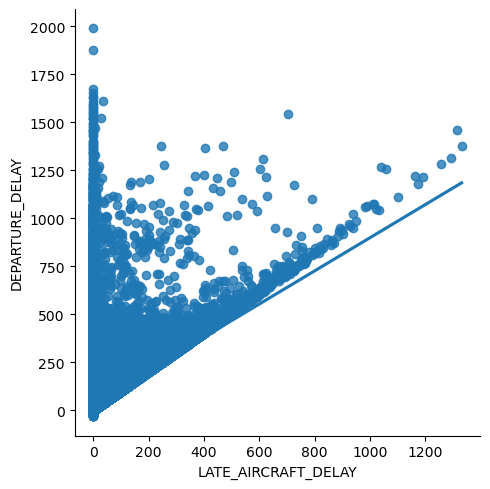

In [7]:
# Create a scatterplot for the "LATE_AIRCRAFT_DELAY" and "DEPARTURE_DELAY" columns in seaborn

late_aircraft_scatterplot = sns.lmplot(x = 'LATE_AIRCRAFT_DELAY', y = 'DEPARTURE_DELAY', data = df)

The scatterplot above is very similar to the previous one, however there is slgihtly more variance in this one. Again we can see the V shaped pattern that show that there are many delays caused by other issues than late aircraft.

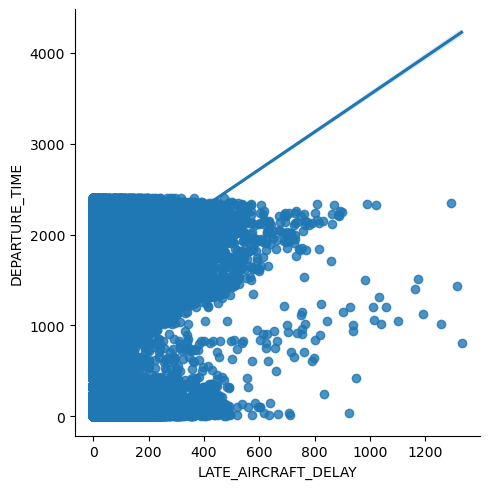

In [8]:
# Create a scatterplot for the "DEPARTURE_TIME" and "LATE_AIRCRAFT_DELAY" columns in seaborn

late_aircraft_departure_time_scatterplot = sns.lmplot(x = 'LATE_AIRCRAFT_DELAY', y = 'DEPARTURE_TIME', data = df)

The correlation here is weaker than the first two scatterplots but it is interesting to see somewhat of a correlation, albeit weak, between departure time and late aircraft delay. This correlation would suggest that the likelihood of have a late aircraft increases throughout the course of the day meanign that flights that take off in the evening are more likely to be delayed.

## Pair Plot

In [9]:
sub2 = sub[['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

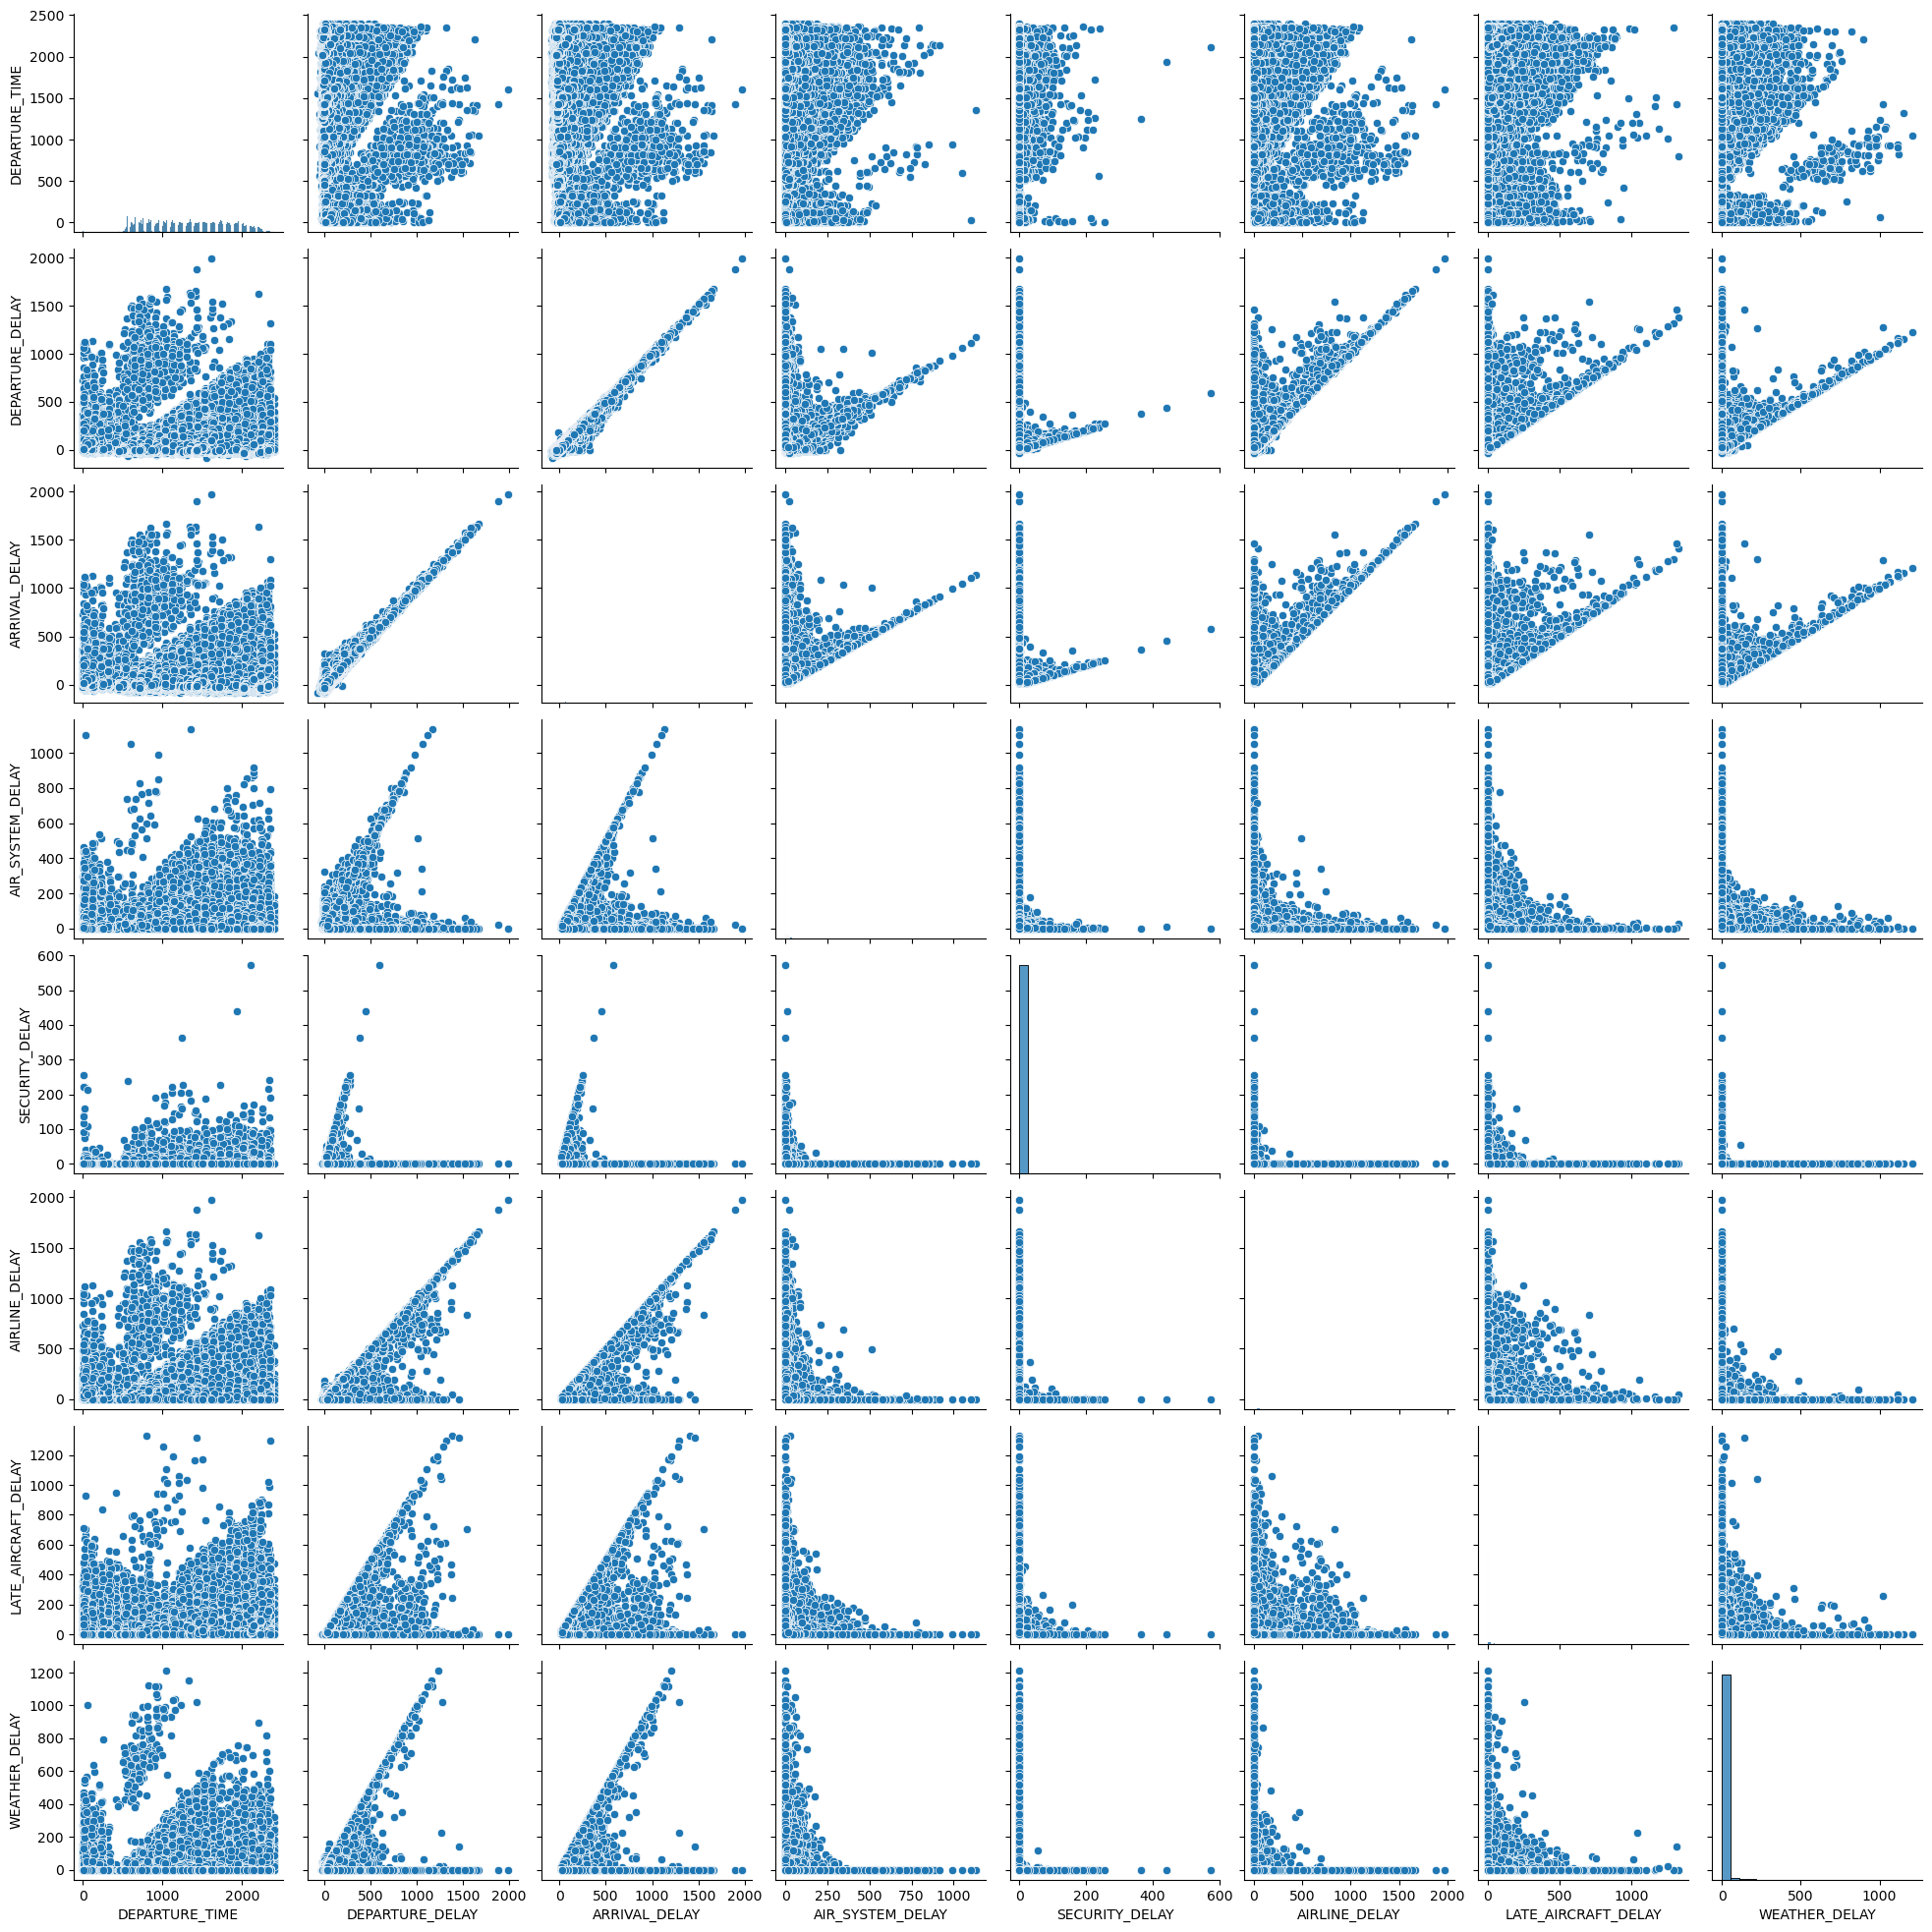

In [10]:
# Create a pair plot 

pair = sns.pairplot(sub2)

The pair plot above shows the scatterplot for each of our variables. Each variable is related to delay and thus the correlation is positive. Some dealy variables have a stronger correlation than others indicating that they are more significant and cause more delays. 

## Histograms

<Axes: xlabel='DEPARTURE_DELAY', ylabel='Count'>

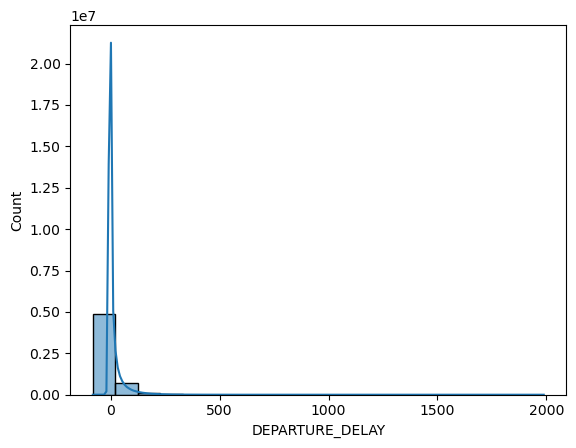

In [11]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['DEPARTURE_DELAY'], bins = 20, kde = True)

Due to a small number of outliers with very long departure delays the histogram is skewed and the graph is not very useful. Therefore we will create a subset removing the outliers.

In [12]:
# Create subset to remove outliers
sub_hist = sub.loc[(sub['DEPARTURE_DELAY'] > -20) & (sub['DEPARTURE_DELAY'] < 60)]

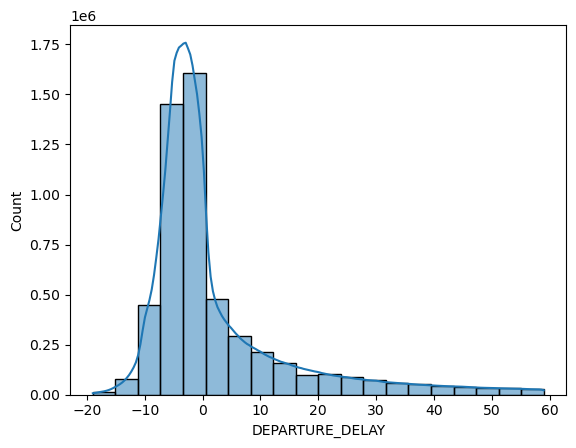

In [13]:
departure_delay_sub_hist = sns.histplot(sub_hist['DEPARTURE_DELAY'], bins = 20, kde = True)

Here we can see a histogram showing the departure delay for flights with delays between 20 minutes early and 60 minutes late. The vast majority of flights leave between 10 mins early and 10 mins late. We will therefore categorize departure delays in the following categories. 

- if DEPARTURE_DELAY < 0 mins = early departure
- if DEPARTURE_DELAY => 0 and < 20 mins = small delayed departure
- if DEPARTURE_DELAY >= 20 mins and < 60 mins = moderate delayed departure
- if DEPARTURE_DELAY >= 60 mins = significant delayed departure

## Create categories for departure delay

In [14]:
df.loc[df['DEPARTURE_DELAY'] < 0, 'DEPARTURE_DELAY_CATEGORY'] = 'Early departure'

In [15]:
df.loc[(df['DEPARTURE_DELAY'] >= 0) & (df['DEPARTURE_DELAY'] < 20), 'DEPARTURE_DELAY_CATEGORY'] = 'Small departure delay'

In [16]:
df.loc[(df['DEPARTURE_DELAY'] >= 20) & (df['DEPARTURE_DELAY'] < 60), 'DEPARTURE_DELAY_CATEGORY'] = 'Moderate departure delay'

In [17]:
df.loc[df['DEPARTURE_DELAY'] > 60, 'DEPARTURE_DELAY_CATEGORY'] = 'Significant departure delay'

In [18]:
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY
0,2015,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
1,2015,1,1,4,45,41.0,-4.0,17.0,58.0,204.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
2,2015,1,1,4,135,NaN,NaN,NaN,NaN,205.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
3,2015,1,1,4,155,140.0,-15.0,17.0,157.0,218.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
4,2015,1,1,4,220,209.0,-11.0,15.0,224.0,200.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
5,2015,1,1,4,505,457.0,-8.0,16.0,513.0,205.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
6,2015,1,1,4,700,653.0,-7.0,16.0,709.0,210.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
7,2015,1,1,4,1035,1027.0,-8.0,21.0,1048.0,207.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
8,2015,1,1,4,1340,1330.0,-10.0,18.0,1348.0,195.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
9,2015,1,1,4,1430,1424.0,-6.0,7.0,1431.0,200.0,...,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure


In [19]:
# Check the frequencies for the "DEPARTURE_DELAY_CATEGORY" column

df['DEPARTURE_DELAY_CATEGORY'].value_counts(dropna = False)

Early departure                3277948
Small departure delay          1568832
Moderate departure delay        555181
Significant departure delay     324171
NaN                              92947
Name: DEPARTURE_DELAY_CATEGORY, dtype: int64

### Departure delay category plot

In [ ]:
# Create scatter plot with delay category
sns.set(style="ticks")
g = sns.catplot(x="DEPARTURE_DELAY", y="ARRIVAL_DELAY", hue="DEPARTURE_DELAY_CATEGORY", data=df)

We can see here in the scatterplot that while the significant departure delay group represent the smallest group in terms of number of flights it dominates the graph due to the outliers that drag the scale of the axis. While there are not a huge number in the significant group, some of the delays were far longer than those in the other categories.

## Questions 

1 - What is the leading cause of delays and cancelations for flights?

We have seen from the heat map that the leading correlation among causes of delay were airline delays and late aircraft delays and so these are likely the leading causes although we will need to do further exploration.

2 - Which airlines have the highest rate of delays and cancelations?

We were only working with quantitative variables this exercise and thus we did not address this questions yet.

3 - Are there some airports or states that have a higher rate of delays and cancelations in flights departing and or arriving at their airports?

We were only working with quantitative variables this exercise and thus we did not address this questions yet.

4 - How successful are airlines and airports at making up lost time if they depart late?

There is a very strong correlation between departure delay and arrival delay suggesting that most flights are unable to make up the lost time. We will need further research to investigate the differences between airlines and airports in making up time.

5 - Do some causes of delays result in longer delays than others?

After the initial exploration it appears likely that airline delays and late aircraft delays result in the longest delays.

6 - How does the time of the year and day of the week impact the rate of delays and cancelations?

We have not yet looked into these variables at this time


## Initial Hypothesis

1 - Airline delays and late aircraft are the two leading causes of delays among flights in the US.

2 - Flights that take off later in the day are more likely to be delayed than those that take off earlier in the day.

## Save Figs

In [ ]:
corr.figure.savefig(os.path.join(path, '04. Visualizations','correlation_heatmap.png'), bbox_inches='tight')

In [ ]:
airline_delay_scatterplot.figure.savefig(os.path.join(path, '04. Visualizations','airline_delay_scatterplot.png'), bbox_inches='tight')

In [ ]:
late_aircraft_departure_time_scatterplot.figure.savefig(os.path.join(path, '04. Visualizations','late_aircraft_departure_time_scatterplot.png'), bbox_inches='tight')

In [ ]:
late_aircraft_scatterplot.figure.savefig(os.path.join(path, '04. Visualizations','late_aircraft_scatterplot.png'), bbox_inches='tight')

In [ ]:
pair.figure.savefig(os.path.join(path, '04. Visualizations','pairplot.png'), bbox_inches='tight')

In [ ]:
departure_delay_sub_hist.figure.savefig(os.path.join(path, '04. Visualizations','departure_delay_histogram.png'), bbox_inches='tight')

In [ ]:
g.figure.savefig(os.path.join(path, '04. Visualizations','departure_arrival_delay_categories.png'), bbox_inches='tight')

In [ ]:
df.to_pickle(os.path.join(path, '01 Data', 'flights_merged_categories.pkl'))